# Luxury Watch

**Column Details**
* Brand: The brand of the watch.
* Model: The model name or number of the watch.
* Case Material: The material used to make the watch case (e.g., stainless steel, titanium, gold).
* Strap Material: The material used to make the watch strap or bracelet (e.g., leather, rubber, metal).
* Movement Type: The type of movement used in the watch (e.g., automatic, manual, quartz).
* Water Resistance: The level of water resistance for the watch (e.g., 30 meters, 100 meters, 600 meters).
* Case Diameter (mm): The diameter of the watch case in millimeters.
* Case Thickness (mm): The thickness of the watch case in millimeters.
* Band Width (mm): The width of the watch strap or bracelet in millimeters.
* Dial Color: The color of the watch dial (e.g., black, blue, silver).
* Crystal Material: The material used for the watch crystal (e.g., sapphire, mineral, hardlex).
* Complications: Any additional functions or features beyond timekeeping (e.g., date display, chronograph, GMT).
* Power Reserve: The amount of time the watch can run without winding or wearing (e.g., 48 hours, 72 hours).
* Price (USD): The retail price of the watch in US dollars.

In [8]:
# Importare le librerie necessarie
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

In [9]:
path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Luxurywatch.csv"

In [10]:
import pandas as pd
import numpy as np 
df= pd.read_csv(path)
df

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.0,13.00,20.0,Black,Sapphire,Date,48 hours,"9,500"
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.5,14.47,21.0,Blue,Sapphire,Date,60 hours,"5,800"
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100 meters,41.0,13.00,20.0,White,Sapphire,Chronograph,42 hours,"4,200"
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30 meters,43.0,14.25,22.0,Black,Sapphire,Chronograph,70 hours,"7,900"
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30 meters,31.0,6.05,20.0,Silver,Sapphire,NaN,NaN,"2,800"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Breguet,Classique,18k Rose Gold,Leather,Automatic,30 meters,38.5,8.25,20.0,White,Sapphire,Date,38 hours,"21,500"
503,Blancpain,Fifty Fathoms,Stainless Steel,Fabric,Automatic,300 meters,45.0,15.50,23.0,Black,Sapphire,Date,120 hours,"13,500"
504,Longines,Master Collection,Stainless Steel,Leather,Automatic,30 meters,38.5,9.70,20.0,Blue,Sapphire,Date,64 hours,"1,800"
505,Vacheron Constantin,Overseas,Stainless Steel,Stainless Steel,Automatic,150 meters,41.5,11.00,22.0,Blue,Sapphire,Date,40 hours,"19,000"


In [11]:
features_to_remove = ['Brand']
df_clean = df.drop(features_to_remove, axis=1)

def convert_to_hours(value):
    if isinstance(value, str):
        if 'hours' in value:
            return float(value.replace(' hours', ''))
        elif 'days' in value:
            return float(value.replace(' days', '')) * 24
    return None

df_clean['Power Reserve'] = df_clean['Power Reserve'].apply(convert_to_hours)

df_clean['Power Reserve'] = df_clean['Power Reserve'].interpolate()

df_clean = df_clean.dropna()

df_clean.to_csv('Cleaned_Luxurywatch.csv', index=False)

print("Dataset pulito e salvato con successo.")


Dataset pulito e salvato con successo.


In [12]:
df_clean["Price (USD)"] = df_clean["Price (USD)"].str.replace(',', '').astype(float)

price_range = {
    "Min Price (USD)": df_clean["Price (USD)"].min(),
    "Max Price (USD)": df_clean["Price (USD)"].max(),
    "Mean Price (USD)": df_clean["Price (USD)"].mean(),
    "Median Price (USD)": df_clean["Price (USD)"].median(),
}

price_range_df = pd.DataFrame.from_dict(price_range, orient='index', columns=["Value"])

price_range_df

,Value
Min Price (USD),650.000000
Max Price (USD),70000.000000
Mean Price (USD),12392.064935
Median Price (USD),8200.000000


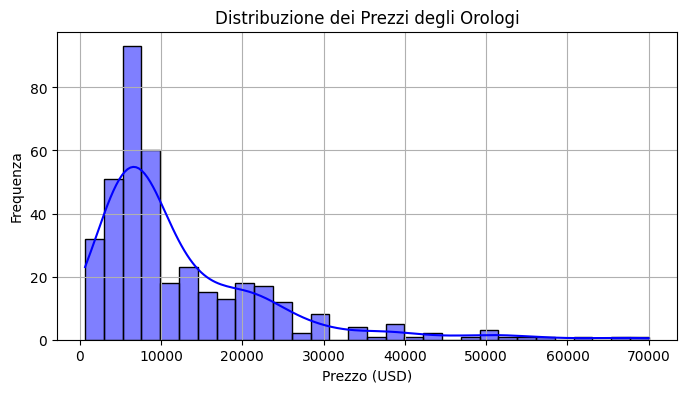

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assicurarsi che tutti i valori siano stringhe prima di sostituire e convertire
df_clean['Price (USD)'] = df_clean['Price (USD)'].astype(str).str.replace(',', '').astype(float)

plt.figure(figsize=(8, 4))
sns.histplot(df_clean['Price (USD)'], kde=True, bins=30, color='blue')
plt.title("Distribuzione dei Prezzi degli Orologi")
plt.xlabel("Prezzo (USD)")
plt.ylabel("Frequenza")
plt.grid(True)
plt.show()


In [14]:
case_material_distribution = df_clean["Case Material"]

case_material_stats = {
    "Total Categories": case_material_distribution.count(),
    "Most Common": case_material_distribution.idxmax(),
    "Frequency of Most Common": case_material_distribution.max(),
    "Least Common": case_material_distribution.idxmin(),
    "Frequency of Least Common": case_material_distribution.min(),
}

case_material_stats_df = pd.DataFrame.from_dict(case_material_stats, orient='index', columns=["Value"])

case_material_distribution

0      Stainless Steel
1             Titanium
2      Stainless Steel
3      Stainless Steel
6      Stainless Steel
            ...       
502      18k Rose Gold
503    Stainless Steel
504    Stainless Steel
505    Stainless Steel
506    Stainless Steel
Name: Case Material, Length: 385, dtype: object

In [15]:
dial_color_distribution = df_clean["Dial Color"]

sorted_dial_colors = dial_color_distribution.sort_values(ascending=False)

sorted_dial_colors.head()

187    White
494    White
444    White
137    White
85     White
Name: Dial Color, dtype: object

In [16]:
strap_material_distribution = df_clean["Strap Material"]

sorted_strap_materials = strap_material_distribution.sort_values(ascending=False)

sorted_strap_materials

91            Titanium
11             Textile
0      Stainless Steel
311    Stainless Steel
279    Stainless Steel
            ...       
54              Canvas
153             Canvas
32              Canvas
33           Alligator
30           Alligator
Name: Strap Material, Length: 385, dtype: object

In [17]:
movement_type_distribution = df_clean["Movement Type"]

sorted_movement_types = movement_type_distribution.sort_values(ascending=False)

sorted_movement_types


216       Quartz
306       Quartz
103       Quartz
93        Quartz
370       Manual
         ...    
185    Automatic
184    Automatic
183    Automatic
182    Automatic
506    Automatic
Name: Movement Type, Length: 385, dtype: object

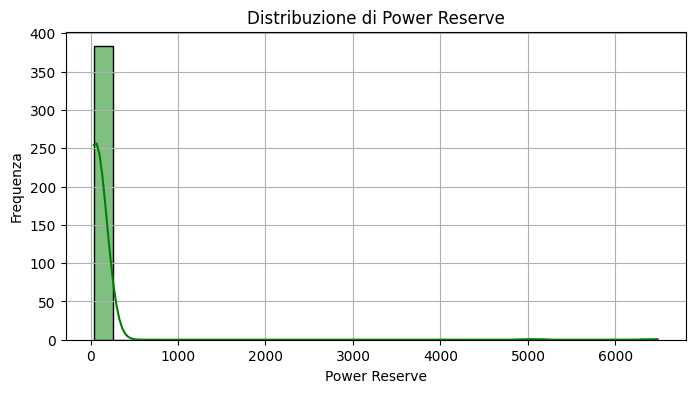

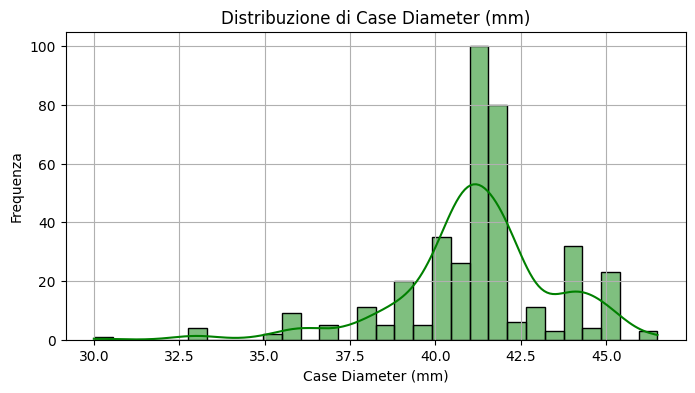

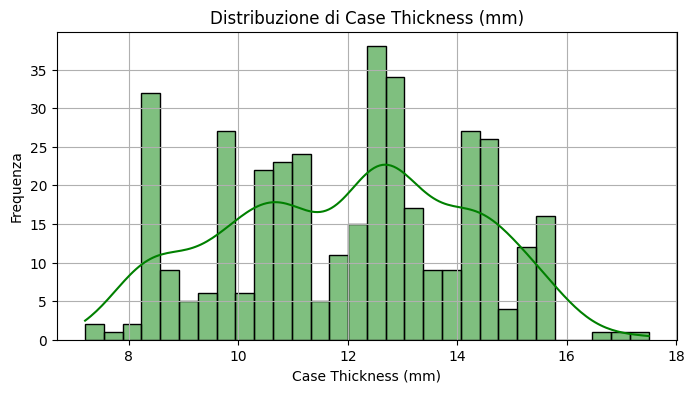

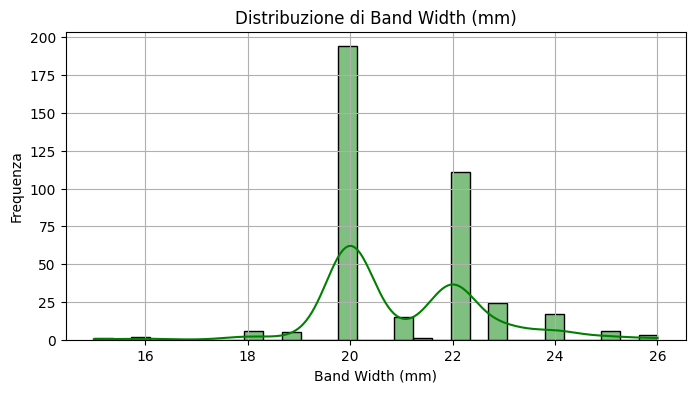

In [18]:
numerical_features = ['Power Reserve', 'Case Diameter (mm)', 'Case Thickness (mm)', 'Band Width (mm)']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_clean[feature], kde=True, bins=30, color='green')
    plt.title(f"Distribuzione di {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequenza")
    plt.grid(True)
    plt.show()

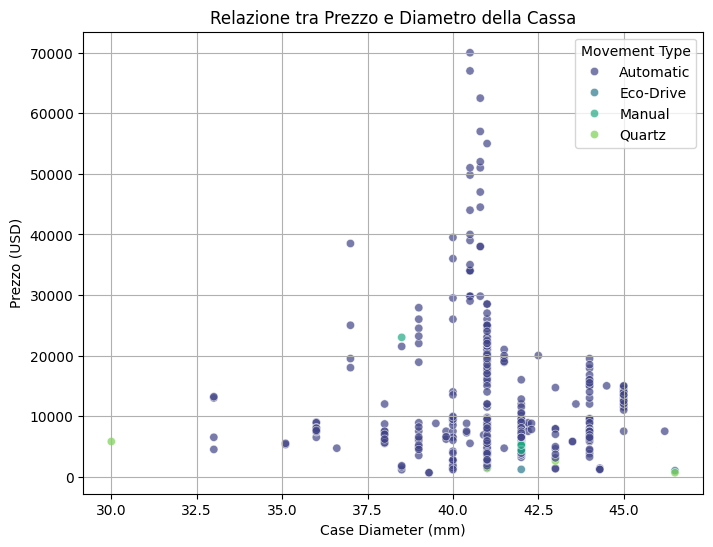

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_clean['Price (USD)'] = df_clean['Price (USD)'].astype(str).str.replace(',', '').astype(float)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Case Diameter (mm)',
    y='Price (USD)',
    hue='Movement Type',
    data=df_clean,
    palette='viridis',
    alpha=0.7
)
plt.title("Relazione tra Prezzo e Diametro della Cassa")
plt.xlabel("Case Diameter (mm)")
plt.ylabel("Prezzo (USD)")
plt.legend(title="Movement Type")
plt.grid(True)
plt.show()


In [21]:
complications_distribution = df_clean["Complications"]
sorted_complications = complications_distribution.sort_values(ascending=False)

sorted_complications

25     World Time, GMT
109      Power Reserve
127          GMT, Date
264          GMT, Date
475          GMT, Date
            ...       
146        Chronograph
354        Chronograph
350        Chronograph
154        Chronograph
137        Chronograph
Name: Complications, Length: 385, dtype: object

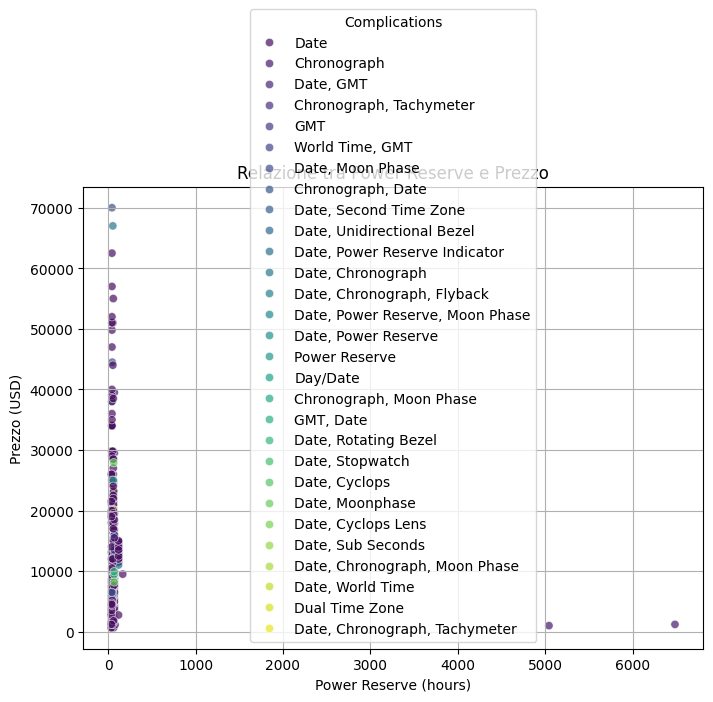

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_clean['Price (USD)'] = df_clean['Price (USD)'].astype(str).str.replace(',', '').astype(float)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Power Reserve',
    y='Price (USD)',
    hue='Complications',
    data=df_clean,
    palette='viridis',
    alpha=0.7
)
plt.title("Relazione tra Power Reserve e Prezzo")
plt.xlabel("Power Reserve (hours)")
plt.ylabel("Prezzo (USD)")
plt.legend(title="Complications")
plt.grid(True)
plt.show()


C:\Users\Martin Trentini\AppData\Local\Temp\ipykernel_6940\3964366728.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Complications', data=df_clean, palette='viridis', order=df_clean['Complications'].value_counts().index)


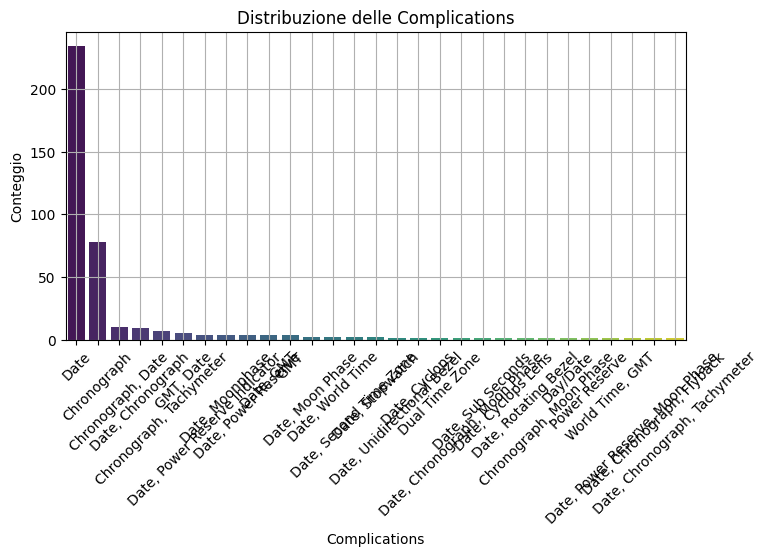

In [24]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Complications', data=df_clean, palette='viridis', order=df_clean['Complications'].value_counts().index)
plt.title("Distribuzione delle Complications")
plt.xlabel("Complications")
plt.ylabel("Conteggio")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

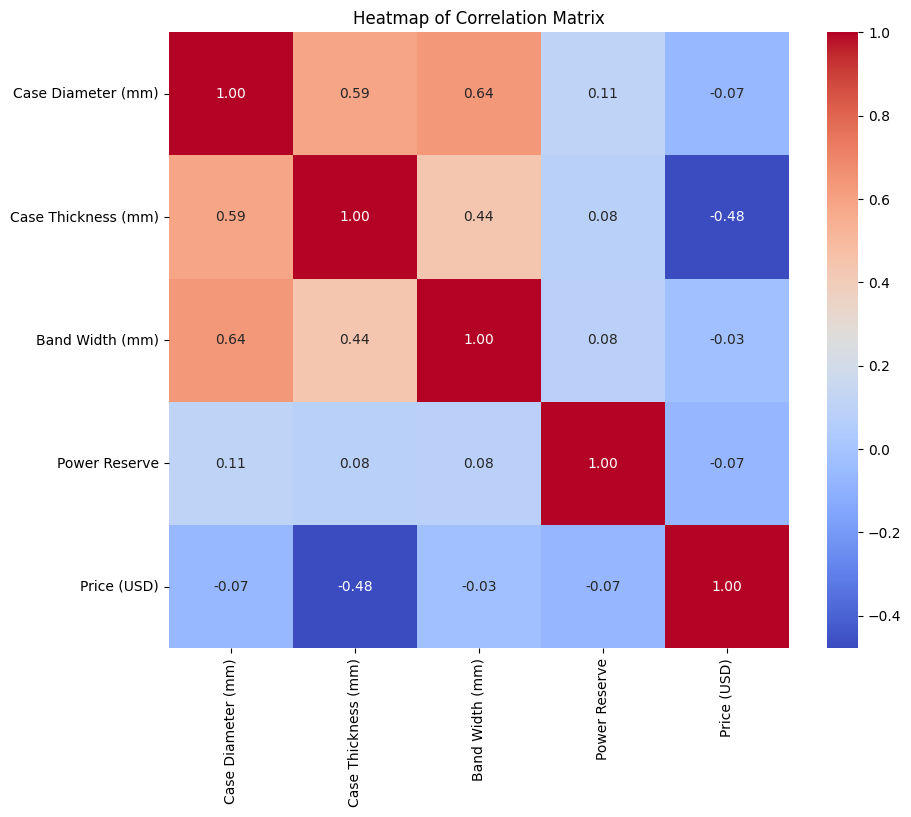

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['Case Diameter (mm)', 'Case Thickness (mm)', 'Band Width (mm)', 'Power Reserve', 'Price (USD)']
df_clean['Price (USD)'] = df_clean['Price (USD)'].astype(str).str.replace(',', '').astype(float)
correlation_matrix = df_clean[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,       
    fmt=".2f",         
    cmap="coolwarm",   
    cbar=True          
)
plt.title("Heatmap of Correlation Matrix")
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

numerical_data = df_clean.drop(
    columns=["Model", "Case Material", "Strap Material", "Movement Type",
             "Water Resistance", "Dial Color", "Crystal Material", "Complications"]
)

In [26]:

X = numerical_data.drop(columns=["Price (USD)"])
y = numerical_data["Price (USD)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": linear_model.coef_
})

In [27]:
results = {
    "Mean Squared Error": mse,
    "R-squared": r2,
    "Intercept": linear_model.intercept_
}

results

{'Mean Squared Error': np.float64(74753842.63555472),
 'R-squared': 0.1764794937179982,
 'Intercept': np.float64(-22409.157552955938)}

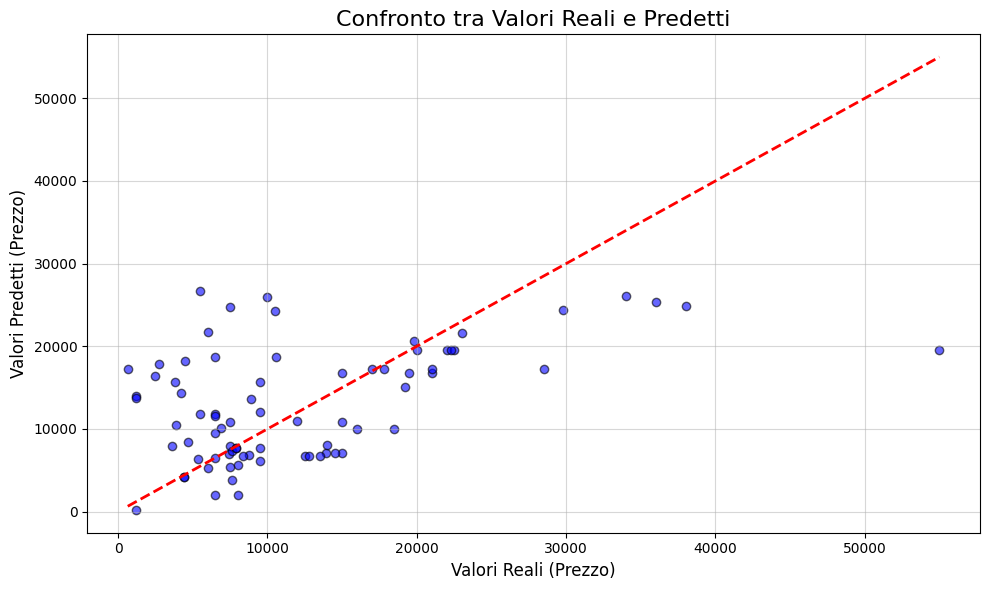

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title("Confronto tra Valori Reali e Predetti", fontsize=16)
plt.xlabel("Valori Reali (Prezzo)", fontsize=12)
plt.ylabel("Valori Predetti (Prezzo)", fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()

# Mostrare il grafico
plt.show()


In [29]:
target_column = "Price (USD)"
categorical_columns = ["Case Material", "Strap Material", "Movement Type", "Dial Color", "Crystal Material"]
numerical_columns = ["Case Diameter (mm)", "Case Thickness (mm)", "Band Width (mm)", "Power Reserve"]


categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),  
    ("onehot", OneHotEncoder(handle_unknown="ignore")) 
])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_columns),
        ("cat", categorical_pipeline, categorical_columns),
    ]
)

In [30]:
ridge_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", Ridge(alpha=1.0))
])

random_forest_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

gb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(n_estimators=100, random_state=42))
])

In [31]:
X = df_clean.drop(columns=[target_column])
y = df_clean[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Definire i modelli
ridge_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", Ridge(alpha=1.0))
])

random_forest_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

gb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(n_estimators=100, random_state=42))
])

In [33]:
# Funzione per valutare un modello su metriche multiple
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R-squared": r2
    }

# Valutare i modelli
ridge_metrics = evaluate_model(ridge_model, X_train, X_test, y_train, y_test)
rf_metrics = evaluate_model(random_forest_model, X_train, X_test, y_train, y_test)
gb_metrics = evaluate_model(gb_model, X_train, X_test, y_train, y_test)

# Creare un DataFrame per confrontare i risultati
model_metrics_comparison = pd.DataFrame({
    "Model": ["Ridge Regression", "Random Forest", "Gradient Boosting"],
    "Mean Squared Error": [ridge_metrics["Mean Squared Error"], rf_metrics["Mean Squared Error"], gb_metrics["Mean Squared Error"]],
    "Mean Absolute Error": [ridge_metrics["Mean Absolute Error"], rf_metrics["Mean Absolute Error"], gb_metrics["Mean Absolute Error"]],
    "R-squared": [ridge_metrics["R-squared"], rf_metrics["R-squared"], gb_metrics["R-squared"]]
})

# Visualizzare il confronto
print(model_metrics_comparison)


               Model  Mean Squared Error  Mean Absolute Error  R-squared
0   Ridge Regression        4.781856e+07          5311.934480   0.473210
1      Random Forest        3.627060e+07          3331.402405   0.600427
2  Gradient Boosting        3.276026e+07          3215.669175   0.639099


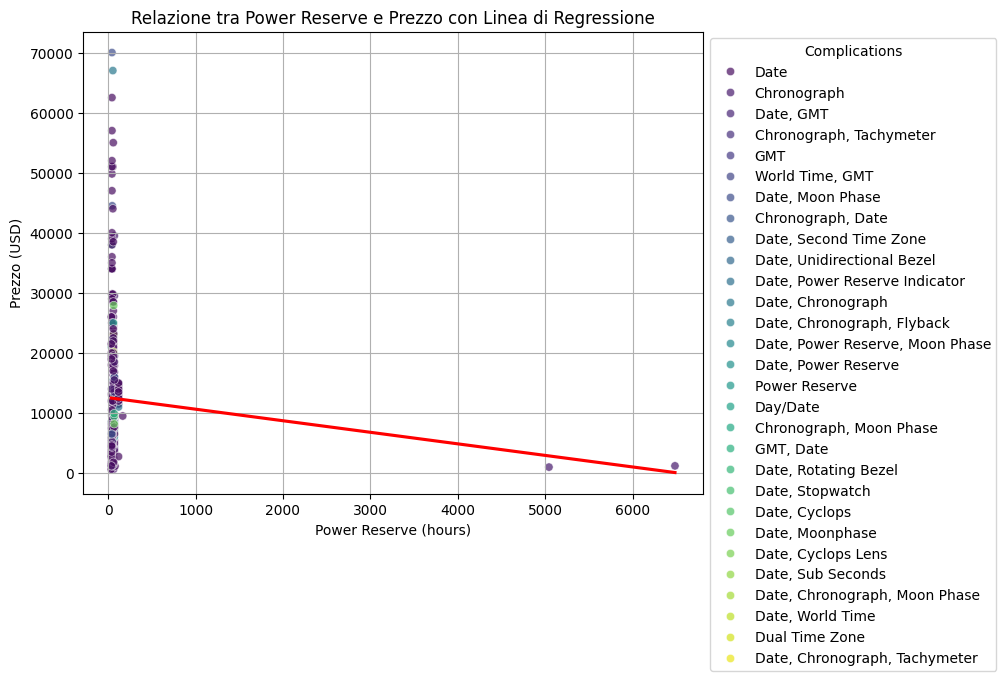

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

df_clean['Price (USD)'] = df_clean['Price (USD)'].astype(str).str.replace(',', '').astype(float)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Power Reserve',
    y='Price (USD)',
    hue='Complications',
    data=df_clean,
    palette='viridis',
    alpha=0.7
)
sns.regplot(
    x='Power Reserve',
    y='Price (USD)',
    data=df_clean,
    scatter=False,  
    color='red',    
    ci=None        
)
plt.title("Relazione tra Power Reserve e Prezzo con Linea di Regressione")
plt.xlabel("Power Reserve (hours)")
plt.ylabel("Prezzo (USD)")
plt.legend(title="Complications", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


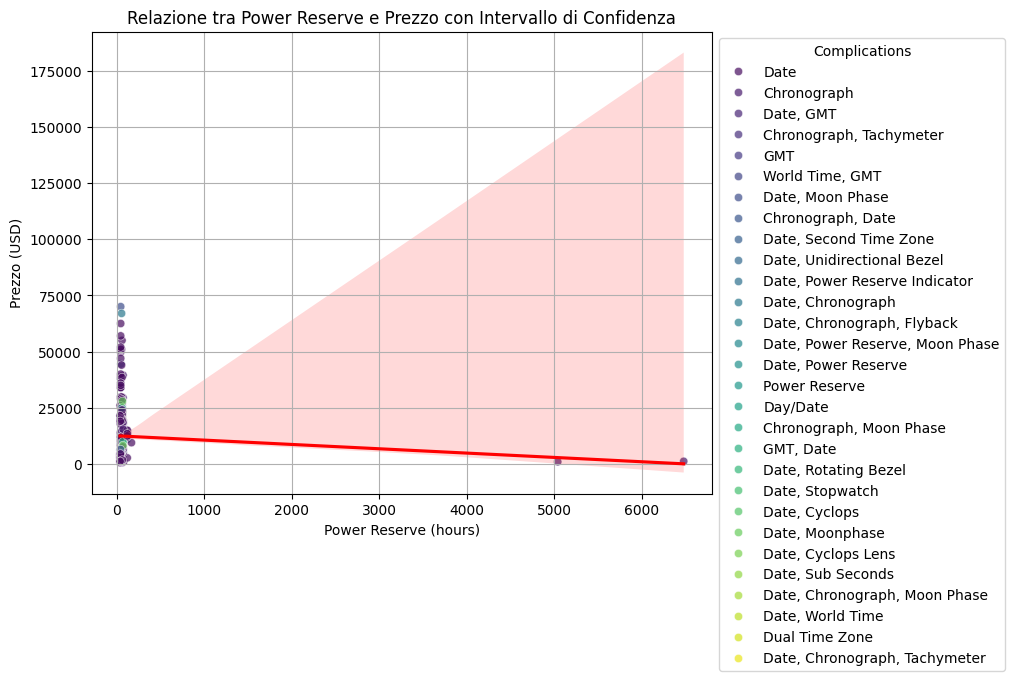

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

df_clean['Price (USD)'] = df_clean['Price (USD)'].astype(str).str.replace(',', '').astype(float)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Power Reserve',
    y='Price (USD)',
    hue='Complications',
    data=df_clean,
    palette='viridis',
    alpha=0.7
)
sns.regplot(
    x='Power Reserve',
    y='Price (USD)',
    data=df_clean,
    scatter=False,  
    color='red',    
    ci=95           
)
plt.title("Relazione tra Power Reserve e Prezzo con Intervallo di Confidenza")
plt.xlabel("Power Reserve (hours)")
plt.ylabel("Prezzo (USD)")
plt.legend(title="Complications", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


In [37]:
# Conclusioni basate sull'analisi statistica:
# 1. Identificazione delle variabili più correlate con 'Price (USD)'.
correlation_with_price = correlation_matrix['Price (USD)'].sort_values(ascending=False)

print("\nCorrelazioni più forti con 'Price (USD)':")
print(correlation_with_price)

# Conclusione:
# - Se alcune variabili mostrano una forte correlazione con il prezzo (ad esempio, 'Power Reserve'),
#   possiamo considerarle come predittori chiave.
# - Se la correlazione è bassa o negativa, queste variabili potrebbero essere meno influenti per determinare il prezzo.

# Riassunto delle Conclusioni:
# - La correlazione suggerisce quali variabili influenzano maggiormente il prezzo.
# - La visualizzazione (scatterplot e regressione) aiuta a comprendere meglio la relazione tra le variabili.
# - Passaggi successivi potrebbero includere l'uso di modelli predittivi basati sulle variabili chiave identificate.



Correlazioni più forti con 'Price (USD)':
Price (USD)            1.000000
Band Width (mm)       -0.026939
Case Diameter (mm)    -0.066590
Power Reserve         -0.071564
Case Thickness (mm)   -0.477931
Name: Price (USD), dtype: float64
